In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-study-performance/Student Study data.csv


In [2]:
df = pd.read_csv('/kaggle/input/student-study-performance/Student Study data.csv')

In [3]:
df.head(10)

,Name,Date,Day,Marital Status,Your gender?,study hour,your sleep hour?,weekend,what is your age?,what is your cgpa
0,Karim,28/6/2022,Sunday,1.0,1,4.0,6,0,23,3.00 - 3.49
1,Karim,29/6/2022,Monday,1.0,1,3.0,6,0,23,3.00 - 3.49
2,Karim,30/6/2022,Tuesday,1.0,1,3.0,7,0,23,3.00 - 3.49
3,Karim,1/7/2022,Wednesday,1.0,1,2.0,5,0,23,3.00 - 3.49
4,Karim,2/7/2022,Thursday,1.0,1,5.0,6,0,23,3.00 - 3.49
5,Karim,3/7/2022,Friday,1.0,1,5.0,7,1,23,3.00 - 3.49
6,Karim,4/7/2022,Saturday,1.0,1,6.0,7,1,23,3.00 - 3.49
7,Mariam,28/6/2022,Sunday,2.0,2,2.0,5,0,22,2.00 - 2.49
8,Mariam,29/6/2022,Monday,2.0,2,3.0,6,0,22,2.00 - 2.49
9,Mariam,30/6/2022,Tuesday,2.0,2,2.0,6,0,22,2.00 - 2.49


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               63 non-null     object 
 1   Date               63 non-null     object 
 2   Day                63 non-null     object 
 3   Marital Status     59 non-null     float64
 4   Your gender?       63 non-null     int64  
 5   study hour         62 non-null     float64
 6   your sleep hour?   63 non-null     int64  
 7   weekend            63 non-null     int64  
 8   what is your age?  63 non-null     int64  
 9   what is your cgpa  63 non-null     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 5.0+ KB


In [5]:
df.isnull().sum()

Name                 0
Date                 0
Day                  0
Marital Status       4
Your gender?         0
study hour           1
your sleep hour?     0
weekend              0
what is your age?    0
what is your cgpa    0
dtype: int64

In [6]:
#Remove all empty and null values
df = df.dropna()

In [7]:
df.isnull().sum()

Name                 0
Date                 0
Day                  0
Marital Status       0
Your gender?         0
study hour           0
your sleep hour?     0
weekend              0
what is your age?    0
what is your cgpa    0
dtype: int64

In [8]:
# Let's rename some columns
df.rename(columns = {'Marital Status':'Marital_Status', 'Your gender?':'Gender', 'study hour':'Study_Hours', 'weekend':'Weekend', 'your sleep hour?':'Sleep_Hours', 'what is your age?':'Age', 'what is your cgpa':'CGPA'}, inplace = True)

In [9]:
#Renamed Columns
df.columns

Index(['Name', 'Date', 'Day', 'Marital_Status', 'Gender', 'Study_Hours',
       'Sleep_Hours', 'Weekend', 'Age', 'CGPA'],
      dtype='object')

<AxesSubplot:ylabel='Marital_Status'>

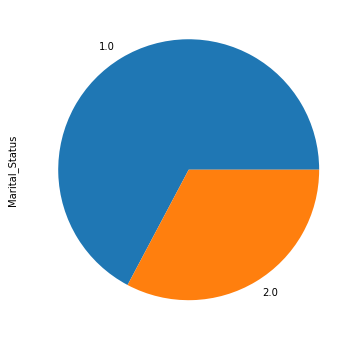

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Marital_Status'].value_counts().head(20).plot(kind = 'pie', figsize = (6,6))


In the above pie chart, 1 depicts married and 2 depicts Unmarried or vice a versa because it's not clearly mentioned in the dataset description.

<AxesSubplot:ylabel='Gender'>

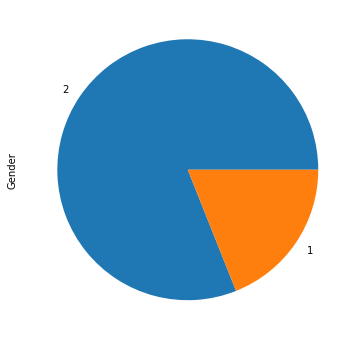

In [11]:
df['Gender'].value_counts().head(20).plot(kind = 'pie', figsize = (6,6))

Your Gender - Depicts clearly that one of the 2 genders has more percentage in the class.

<AxesSubplot:ylabel='Study_Hours'>

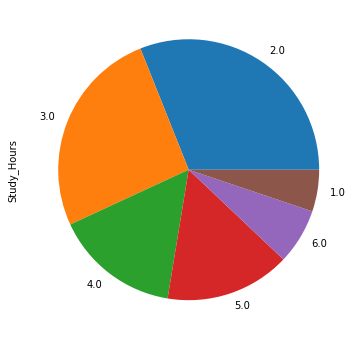

In [12]:
df['Study_Hours'].value_counts().head(20).plot(kind = 'pie', figsize = (6,6))

Maximum number of students studied for 2 - 3 hours.

<AxesSubplot:ylabel='Sleep_Hours'>

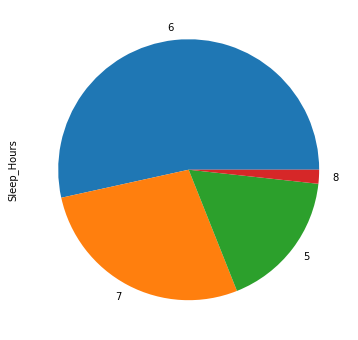

In [13]:
df['Sleep_Hours'].value_counts().head(20).plot(kind = 'pie', figsize = (6,6))

While maximum students slept for about 6 - 7 hours. Only least number of students were able to get atleast 8 hours of sleep.

<AxesSubplot:ylabel='Weekend'>

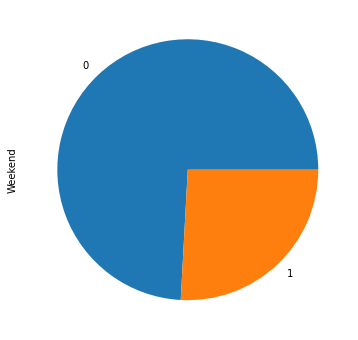

In [14]:
df['Weekend'].value_counts().head(20).plot(kind = 'pie', figsize = (6,6))

Was it a weekend in the place of the student? Well the stats show that it was a weekend in the place of student.

<AxesSubplot:ylabel='Age'>

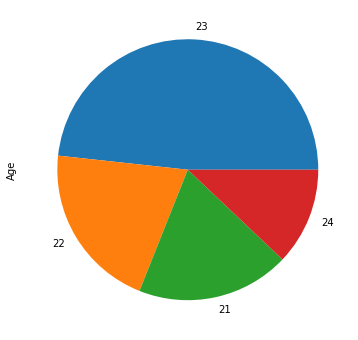

In [15]:
df['Age'].value_counts().head(20).plot(kind = 'pie', figsize = (6,6))

The pie chart shows that majority students in the class were of age 23, while those of ages 21, 22 and 24 were almost the same. 

<AxesSubplot:ylabel='CGPA'>

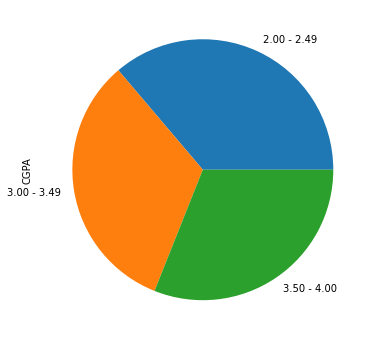

In [16]:
df['CGPA'].value_counts().head(20).plot(kind = 'pie', figsize = (6,6))

From the above pie chart we can infer that the class compised of all kinds of students.

Overperforming - CGPA(3.50 - 4.00)

Medium Performing - CGPA(3.00 - 3.49)

Underperforming - CGPA(2.00 - 2.49)

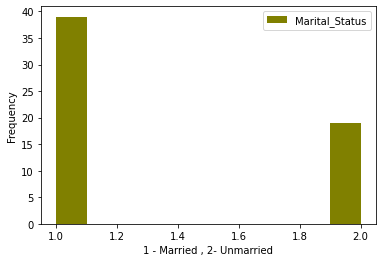

In [17]:
df.Marital_Status.plot(kind = 'hist', color = 'olive')
plt.xlabel('1 - Married , 2- Unmarried')
plt.legend()

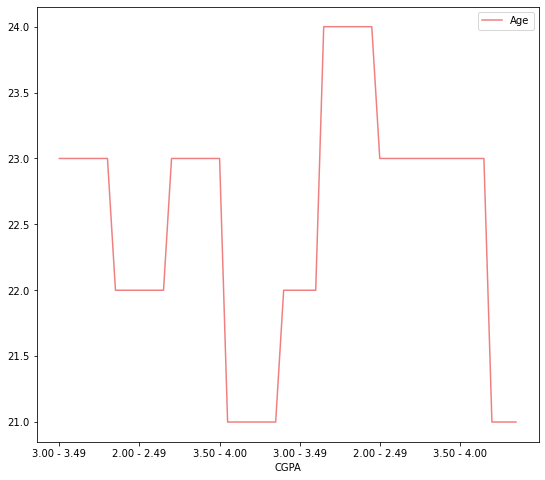

In [18]:
df.plot(x="CGPA", y="Age", kind="line", figsize=(9, 8), color = 'lightcoral')
plt.show()

While there seems no way to draw conclusions between age and CGPA.

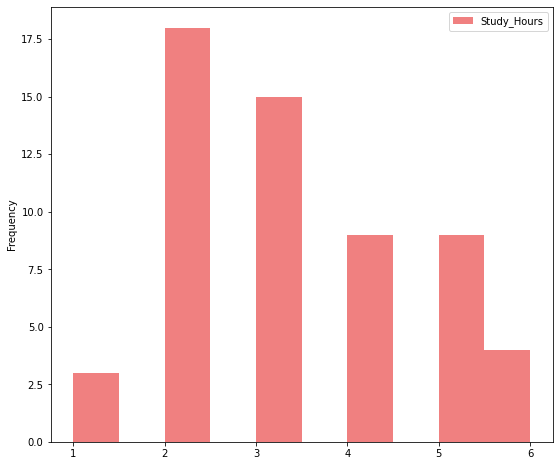

In [19]:
df.plot(x="CGPA", y="Study_Hours", kind="hist", figsize=(9, 8), color = 'lightcoral')
plt.show()

Maximum people studied for about 2-3 hours.

Text(0.5, 0, 'Study Hours')

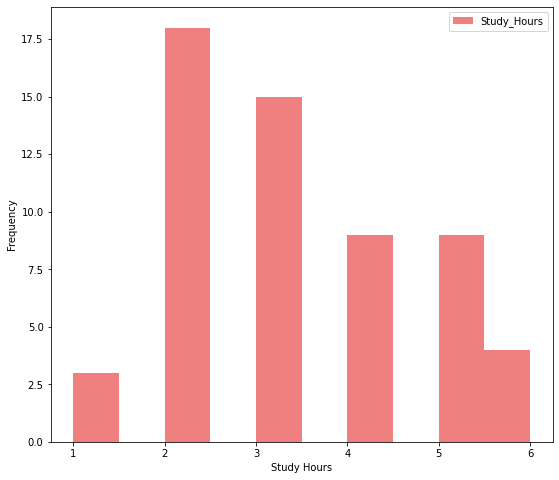

In [20]:
#Let's check which gender studied the max hours
df.plot(x="Gender", y="Study_Hours", kind="hist", figsize=(9, 8), color = 'lightcoral')
plt.xlabel('Study Hours')

Above graph shows that gender 2 studied more than gender 1.

Text(0.5, 0, 'Gender')

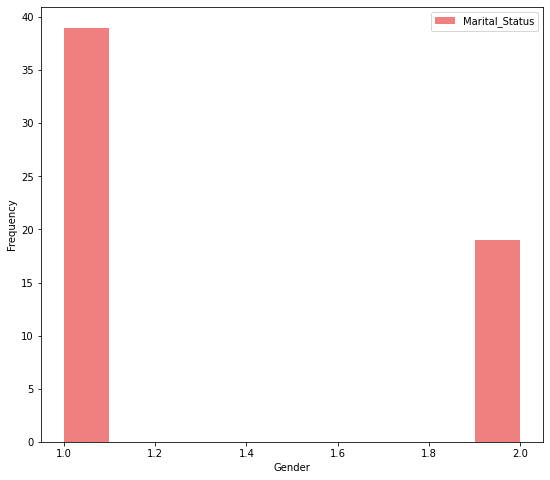

In [21]:
#Let's check which gender was married
df.plot(x="Gender", y="Marital_Status", kind="hist", figsize=(9, 8), color = 'lightcoral')
plt.xlabel('Gender')

Majority students of Gender 1 were Married.

Thank you :)

Feel free to drop in any feedback or resources in the comments.